<a href="https://colab.research.google.com/github/gmp007/Machine-Learning-and-EDA-Exploratory-Data-Analysis-Projects/blob/main/ANN_FaceRecognition/CNN_Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cekumagroup.cas.lehigh.edu/sites/cekumagroup.cas2.lehigh.edu/files/image10.jpg "/>

# About the dataset 
## Facial Recognition with Deep Learning in Keras using CNN
    
# Problem Statement
* Facial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and "tailored" advertisement. You are a computer vision Engineer who needs to develop a face recognition programme with deep convolutional neural networks.

# Objective 
* Use a deep convolutional neural network to perform facial recongition using Kera.


*Notes*
### Dataset Details:
- ORL face database composed of 400 images of size 112 x 92. 
- There are 40 people, 10 images per person.
- The images were taken at different times, lighting and facial expressions.
- The faces are in an upright position in frontal view, with a slight left-right rotation.
**Happy reading!**

* * *

 # Step1:
 
## Import the required library

In [1]:
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Metric analysis libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools


# ANN-related libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

## This is expensive. Only turn on if you have GPU enabled
bestmodel = True

# Step2:
## Load the dataset and do initial data cleaning

In [2]:
#load the dataset
faceRecog_data = np.load('ORL_faces.npz') 

In [3]:
!ls -l

total 762412
-rw-r--r-- 1 root root 747721704 Mar 13 15:59 FaceRecog.h5
-rw-r--r-- 1 root root  32973922 Mar 13 15:16 ORL_faces.npz
drwxr-xr-x 1 root root      4096 Mar  9 14:48 sample_data


In [4]:
# load the "Train Images"
X_train = faceRecog_data['trainX']

X_test = faceRecog_data['testX']


#normalize every image 
# Note, the format of the image is a Uint8 matrix of pixels. We convert to float or double
X_train = np.array(X_train,dtype='float64')/255
X_test = np.array(X_test,dtype='float64')/255

# load the Label of Images
y_train= faceRecog_data['trainY']
y_test= faceRecog_data['testY']

In [5]:
# View the train and test data format
print('X_train : {}'.format(X_train[:]))
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train : [[0.18823529 0.19215686 0.17647059 ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313725 ... 0.1254902  0.13333333 0.13333333]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196078 0.11372549]
 ...
 [0.44705882 0.45882353 0.44705882 ... 0.38431373 0.37647059 0.38431373]
 [0.41176471 0.41176471 0.41960784 ... 0.21176471 0.18431373 0.16078431]
 [0.45490196 0.44705882 0.45882353 ... 0.37254902 0.39215686 0.39607843]]
X_train shape: (240, 10304)
X_test shape: (160, 10304)
y_train shape: (240,)


# Step 3

### Split that dataSet into validation and train datasets 

**The Validation dataset is used to reduce any potential overfitting. As a general rule of thumb, if the accuracy of the training dataset increases, but the accuracy of the validation dataset stays the same or diminishes significantly, then you're probably overfitting.**

In [6]:
# Here, we will use 10% for validation.
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=.10, random_state=100)

# Step 4

### We need to setup the data for the CNN. To do achieve this, we rescale the size of images to be the same

In [7]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)
X_validate = X_validate.reshape(X_validate.shape[0], *im_shape)

In [8]:
# Check the shape
print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: (216, 112, 92, 1)
x_test shape: (160,)


# Step 5


## Build the CNN model:
 **CNN have 3 main layer** 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer 

In [9]:

#filters= the depth of output image or kernels
lr = 2e-4
decay = 6e-8
CNN_model= Sequential([
    Conv2D(filters=36, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=3, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.3),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(20, activation='softmax')  
])

# Compile the model
CNN_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=lr*0.5, decay=decay*0.5),
    metrics=['accuracy']
)

In [10]:
# View model parameters
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 88, 36)       936       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 44, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 42, 54)        17550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 21, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29484)             0         
                                                                 
 dense (Dense)               (None, 2024)              5

# Step 6

Train the Model

In [11]:
# Define model callbacks
model_callbacks = [keras.callbacks.ModelCheckpoint('FaceRecog.h5',monitor='val_accuracy',save_best_only=True,mode='min',verbose=1),
                   keras.callbacks.EarlyStopping(monitor='val_loss',patience=25,mode='min',min_delta=0.0001,restore_best_weights=True)
    
    
]

batch_size = 128
history=CNN_model.fit(X_train, y_train, 
                      batch_size=batch_size,
                      epochs=500,
                      steps_per_epoch = X_train.shape[0]//batch_size,
                      validation_data=(X_validate, y_validate),
                      #validation_steps = X_validate.shape[0]//batch_size, #Data too small for this to be meaningful
                      callbacks = [model_callbacks],
                      verbose=1
                     )


Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 3.0021 - accuracy: 0.0469
Epoch 1: val_accuracy improved from inf to 0.04167, saving model to FaceRecog.h5
1/1 [==============================] - 10s 10s/step - loss: 3.0021 - accuracy: 0.0469 - val_loss: 2.9764 - val_accuracy: 0.0417
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 3.0279 - accuracy: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.04167
1/1 [==============================] - 1s 674ms/step - loss: 3.0279 - accuracy: 0.0000e+00 - val_loss: 2.9873 - val_accuracy: 0.0417
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 2.9738 - accuracy: 0.0938
Epoch 3: val_accuracy did not improve from 0.04167
1/1 [==============================] - 0s 231ms/step - loss: 2.9738 - accuracy: 0.0938 - val_loss: 3.0001 - val_accuracy: 0.0417
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 2.9838 - accuracy: 0.0568
Epoch 4: val_accuracy did not improve from 0.04167


## Evaluate the accuracy of the model. We use the test data


In [12]:
test_score = CNN_model.evaluate(X_test, y_test)

print('test los {:.4f}'.format(test_score[0]))
print('test acc {:.4f}'.format(test_score[1]))

5/5 [==============================] - 0s 20ms/step - loss: 0.2688 - accuracy: 0.9375
test los 0.2688
test acc 0.9375


# Step 7 

plot and visualize some of the key results

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
232,0.005138,1.0,0.004679,1.0,232
233,0.007558,1.0,0.006377,1.0,233
234,0.006017,1.0,0.008465,1.0,234
235,0.010076,1.0,0.010347,1.0,235
236,0.005558,1.0,0.010492,1.0,236


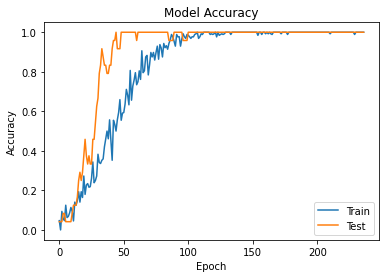

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

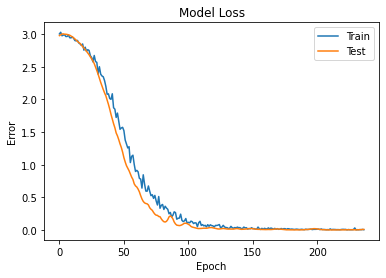

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Step 8

Plot the Confusion Matrix

In [17]:
predicted = CNN_model.predict(X_test)# (CNN_model.predict(X_test)> 0.5).astype("int32")
ynew = np.argmax(predicted,axis=1) #CNN_model.predict_classes(X_test)


Accuracy = accuracy_score(y_test, ynew)
print("The accuracy is : ",Accuracy)

The accuracy is :  0.9375


In [18]:
# Define a function to plot the confusion matrix
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix = confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [19]:
print('Confusion Matrix, with normalization')
print(cnf_matrix)

Confusion Matrix, with normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]


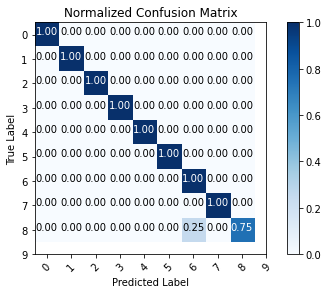

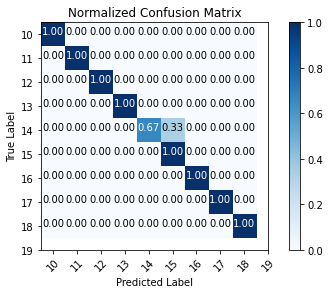

Confusion Matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1

In [20]:
#Plot the CM and visualize it
plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Normalized Confusion Matrix')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Normalized Confusion Matrix')

print("Confusion Matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))

# Step 9

# We can use the saved best model to do predictions, especially in the future
**You need GPU for this. Better Amazon SageMaker. Note, this is not an advertisement**


In [21]:
if bestmodel==True:
    best_model = keras.models.load_model('FaceRecog.h5',compile=True)
    best_model.summary()
best_model.predict(X_test)
ynew = np.argmax(predicted,axis=1)
#Print the accuracy
print("The accuracy is : ",accuracy_score(y_test, ynew))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 88, 36)       936       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 44, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 42, 54)        17550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 21, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29484)             0         
                                                                 
 dense (Dense)               (None, 2024)              5

# End of Case Study